## Implied volatility and volatility surface


By Taylor series expansion:

$f(x) \approx f(a) + f'(a)(x - a)$

we can rewrite it as:

$x \approx a - \frac{f(a)-f(x)}{f'(a)}$

Suppose we know the value of $f(x)$ but do not know the value of $x$, we can use the Newton-Raphson method. We first make a guess for $x = x_0$ and then update the value of $x_0$ by iterations:

$x_1 = x_0 - \frac{f(x_0)-f(x)}{f'(x_0)}$

$x_2 = x_1 - \frac{f(x_1)-f(x)}{f'(x_1)}$

$...$

$x_{n+1} = x_n - \frac{f(x_n)-f(x)}{f'(x_n)}$

Eventually, if the quadratic convergence condition holds, the difference between $f(x_{n+1})$ and $f(x_n)$ will become smaller and smaller. Once the difference is smaller than the pre-specified precision, we will get the value of $x$.

In [2]:
def f(x):
    y = x**3 - 2*x**2 + 1
    return y

def f1(x):  # diff the preivious func once 
    y1 = 3*x**2 - 4*x
    return y1

In [3]:
# setting 
max_iter = 100
precision = 1.0e-10
x_guess = -3   # init guess 
y_actual = 10


for i in range(0, max_iter):
    y = f(x_guess)
    y1 = f1(x_guess)
    diff = y - y_actual
    
    print('*** This is loop #'+str(i)+' ***')
    print('The guess for x is ' + str(round(x_guess,3)) + ' and the y value is ' + str(round(y,3)))
    
    if (abs(diff) < precision):   # out precision goal 
        break
    else: 
        x_guess = x_guess - diff/y1  # assign new x_guess value by newton method 

*** This is loop #0 ***
The guess for x is -3 and the y value is -44
*** This is loop #1 ***
The guess for x is -1.615 and the y value is -8.434
*** This is loop #2 ***
The guess for x is -0.325 and the y value is 0.754
*** This is loop #3 ***
The guess for x is 5.385 and the y value is 99.185
*** This is loop #4 ***
The guess for x is 4.023 and the y value is 33.744
*** This is loop #5 ***
The guess for x is 3.292 and the y value is 14.995
*** This is loop #6 ***
The guess for x is 3.033 and the y value is 10.508
*** This is loop #7 ***
The guess for x is 3.001 and the y value is 10.008
*** This is loop #8 ***
The guess for x is 3.0 and the y value is 10.0
*** This is loop #9 ***
The guess for x is 3.0 and the y value is 10.0


2. Black-Scholes-Merton Model Functions
- basic bsm funcs 

To compute implied volatility, we need the Black-Scholes-Merton model:

$C_t = SN(d_1) - Ke^{-rt}N(d_2)$

$P_t = Ke^{-rt}N(-d_2) - SN(-d_1)$

$d_1 = \frac{\ln(\frac{S}{K})+(r+\frac{1}{2}\sigma^2)t}{\sigma\sqrt{t}}$

$d_2 = d_1 - \sigma\sqrt{t}$

and the option Vega:

$v_C = v_P = SN'(d_1)\sqrt{T-t}$



In [4]:
import numpy as np
from scipy import stats

def BS_call(S, K, r, T, v):
    d1 = (np.log(S/K) + (r + 0.5 * v**2)*T)/(v * np.sqrt(T))
    d2 = d1 - v * np.sqrt(T)
    Call = S * stats.norm.cdf(d1,0.0,1.0) - K * np.exp(-r*T) * stats.norm.cdf(d2,0.0,1.0)
    return Call

def BS_put(S, K, r, T, v):
    d1 = (np.log(S/K) + (r + 0.5 * v**2)*T)/(v * np.sqrt(T))
    d2 = d1 - v * np.sqrt(T)
    Put = K * np.exp(-r*T) * stats.norm.cdf(-d2,0.0,1.0) - S * stats.norm.cdf(-d1,0.0,1.0)
    return Put

def BS_vega(S, K, r, T, v):
    d1 = (np.log(S/K) + (r + 0.5 * v**2)*T)/(v * np.sqrt(T))
    vega = S * stats.norm.pdf(d1,0.0,1.0) * np.sqrt(T)
    return vega

Implied Volatility Calculator:


- call IV

In [5]:
def BS_call_iv(S, K, r, T, v_guess, c_actual):
    max_iter = 100
    precision = 1.0e-10
    
    for i in range(0, max_iter):
        c = BS_call(S, K, r, T, v_guess)
        vega = BS_vega(S, K, r, T, v_guess)  # diff previous by once 
        diff = c - c_actual   # BSM_Call - Call market value 
        
        print('*** This is loop #'+str(i)+' ***')
        print('The guess for volatility is ' + str(round(v_guess,3)) + 
              ' and the call price is ' + str(round(c,3)))
        
        if (abs(diff) < precision):
            return v_guess    # final return 
        v_guess = v_guess - diff/vega

# Test the function
S = 5
K = 10
r = 0.05
T = 5
v = 0.2

c_actual = BS_call(S, K, r, T, v)   # actual y 
print('The BSM price is ' + str(round(c_actual,3)))
print('final implied volatility value: ' +  str(BS_call_iv(S, K, r, T, 0.5, c_actual)) )   # just like previous newton method 

The BSM price is 0.233
*** This is loop #0 ***
The guess for volatility is 0.5 and the call price is 1.501
*** This is loop #1 ***
The guess for volatility is 0.212 and the call price is 0.273
*** This is loop #2 ***
The guess for volatility is 0.2 and the call price is 0.234
*** This is loop #3 ***
The guess for volatility is 0.2 and the call price is 0.233
*** This is loop #4 ***
The guess for volatility is 0.2 and the call price is 0.233
final implied volatility value: 0.2000000000000792


- put IV 

In [6]:
import numpy as np
from scipy import stats

def BS_put(S, K, r, T, v):
    d1 = (np.log(S/K) + (r + 0.5 * v**2)*T)/(v * np.sqrt(T))
    d2 = d1 - v * np.sqrt(T)
    Put = K * np.exp(-r*T) * stats.norm.cdf(-d2,0.0,1.0) - S * stats.norm.cdf(-d1,0.0,1.0)
    return Put

def BS_vega(S, K, r, T, v):
    d1 = (np.log(S/K) + (r + 0.5 * v**2)*T)/(v * np.sqrt(T))
    vega = S * stats.norm.pdf(d1,0.0,1.0) * np.sqrt(T)
    return vega

In [8]:
def BS_put_iv(S, K, r, T, v_guess, p_actual):
    max_iter = 100
    precision = 1.0e-10
    
    for i in range(0, max_iter):
        p = BS_put(S, K, r, T, v_guess)
        vega = BS_vega(S, K, r, T, v_guess)  # diff previous by once 
        diff = p - p_actual   
        
        print('*** This is loop #'+str(i)+' ***')
        print('The guess for volatility is ' + str(round(v_guess,3)) + 
              ' and the put price is ' + str(round(p,3)))
        
        if (abs(diff) < precision):
            return v_guess    # final return 
        v_guess = v_guess - diff/vega

# Test the function
S = 5
K = 10
r = 0.05
T = 5
v = 0.2

p_actual = BS_put(S, K, r, T, v)   # actual y 
print('The BSM price is ' + str(round(p_actual,3)))
print('final implied volatility value: ' +  str(BS_put_iv(S, K, r, T, 0.5, p_actual)) )   # just like previous newton method 

The BSM price is 3.021
*** This is loop #0 ***
The guess for volatility is 0.5 and the put price is 4.289
*** This is loop #1 ***
The guess for volatility is 0.212 and the put price is 3.061
*** This is loop #2 ***
The guess for volatility is 0.2 and the put price is 3.022
*** This is loop #3 ***
The guess for volatility is 0.2 and the put price is 3.021
*** This is loop #4 ***
The guess for volatility is 0.2 and the put price is 3.021
final implied volatility value: 0.20000000000007892


3. Volatility Surface : 
- First, we have to download market data for the CBoE Mini-SPX option from Yahoo! Finance.

In [9]:
import yfinance as yf
import pandas as pd

opt = yf.Ticker("^XSP")
opt.options

('2025-01-08',
 '2025-01-09',
 '2025-01-10',
 '2025-01-13',
 '2025-01-14',
 '2025-01-15',
 '2025-01-16',
 '2025-01-17',
 '2025-01-21',
 '2025-01-22',
 '2025-01-23',
 '2025-01-24',
 '2025-01-27',
 '2025-01-28',
 '2025-01-29',
 '2025-01-30',
 '2025-01-31',
 '2025-02-03',
 '2025-02-04',
 '2025-02-05',
 '2025-02-07',
 '2025-02-10',
 '2025-02-14',
 '2025-02-21',
 '2025-02-28',
 '2025-03-07',
 '2025-03-21',
 '2025-03-31',
 '2025-04-17',
 '2025-04-30',
 '2025-05-16',
 '2025-05-30',
 '2025-06-20',
 '2025-06-30',
 '2025-07-18',
 '2025-07-31',
 '2025-08-15',
 '2025-08-29',
 '2025-09-19',
 '2025-09-30',
 '2025-10-17',
 '2025-10-31',
 '2025-11-21',
 '2025-12-19',
 '2026-01-16',
 '2026-06-18')

- Next, we have to compute the time-to-maturity for each option contract.

In [10]:
from datetime import date
import warnings 
warnings.filterwarnings('ignore')

# Delete df if it exists in local variables --> to avoid previous and current conflicts 
if 'df' in locals():
   del df

# Process each option expiration date
for i in opt.options:
   # Get calls data for current expiration
   tmp = opt.option_chain(i).calls
   
   # Select strike and implied volatility columns
   tmp = tmp[['strike', 'impliedVolatility']]
   
   # Calculate time to maturity (days)
   tmp['maturity'] = pd.to_datetime(i, format='%Y-%m-%d', errors='ignore') - pd.to_datetime(date.today())
   
   # Add settlement date
   tmp['settlement'] = pd.to_datetime(i, format='%Y-%m-%d', errors='ignore')
   
   # Concatenate with existing data or create new dataframe
   try:
       df = pd.concat([df, tmp])
   except:
       df = tmp

# Display the resulting dataframe
df

,strike,impliedVolatility,maturity,settlement
0,375.0,4.798832,0 days,2025-01-08
1,568.0,0.717044,0 days,2025-01-08
2,570.0,0.673343,0 days,2025-01-08
3,580.0,0.495122,0 days,2025-01-08
4,584.0,0.386725,0 days,2025-01-08
...,...,...,...,...
75,850.0,0.141793,526 days,2026-06-18
76,855.0,0.143685,526 days,2026-06-18
77,860.0,0.142465,526 days,2026-06-18
78,865.0,0.143319,526 days,2026-06-18


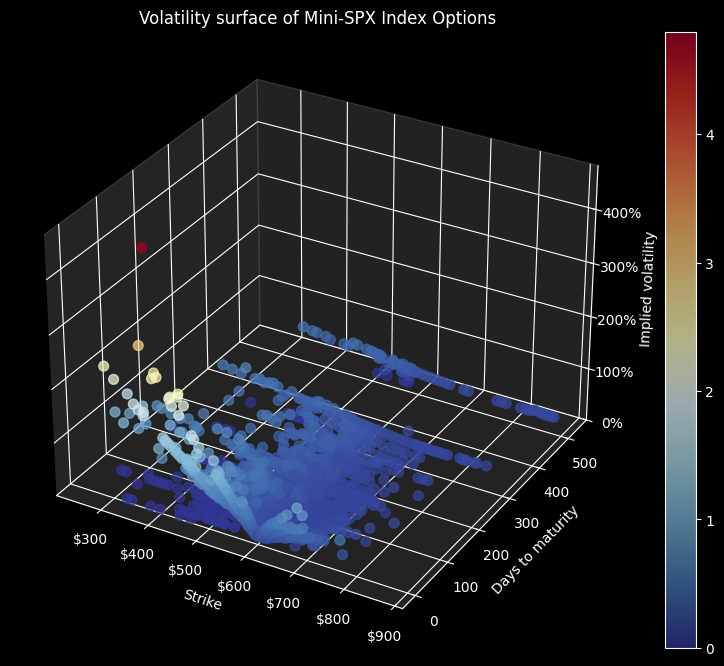

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as mtick

plt.style.use('dark_background')
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.xaxis.pane.set_alpha(0.15)
ax.yaxis.pane.set_alpha(0.15)
ax.zaxis.pane.set_alpha(0.15)

cm = plt.cm.get_cmap('RdYlBu_r')
x = df.strike
y = df.maturity.dt.days
z = df.impliedVolatility
zmax = round(np.max(z),1)

sc = ax.scatter(x, y, z, c=z, marker='o', alpha=0.7, vmin=0, vmax=zmax, s=50, cmap=cm)
plt.colorbar(sc)
plt.title('Volatility surface of Mini-SPX Index Options')
ax.set_zlim(0, zmax)
ax.set_xlabel('Strike')
ax.set_ylabel('Days to maturity')
ax.set_zlabel('Implied volatility')

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('$%d'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.gca().zaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

### note : 
- x : strike, y : TTM , z : iv 
- x : for strike price more OTM, the iv is way higher --> volatility smile --> tail risk 
    - - if ATM, the lower the iv 
- y : TTM , Longer-dated options generally show higher implied volatility
